In [2]:
import pandas as pd
import numpy as np
players=pd.read_excel("Player.xlsx")
ball=pd.read_excel("Ball_by_Ball.xlsx")
match=pd.read_excel("Match.xlsx")
team=pd.read_excel("Team.xlsx")
season=pd.read_excel("Season.xlsx")
player_match=pd.read_excel("Player_Match.xlsx")

In [3]:
# Checking the data types of each columns in the dataset
ball.dtypes

Match_Id                     int64
Season_Id                    int64
Innings_Id                   int64
Over_Id                      int64
Ball_Id                      int64
Team_Batting_Id              int64
Team_Bowling_Id              int64
Striker_Id                   int64
Striker_Batting_Position     int64
Non_Striker_Id               int64
Bowler_Id                    int64
Batsman_Scored               int64
Extra_Type                  object
Extra_Runs                  object
Player_dissimal_Id          object
Dissimal_Type               object
Fielder_Id                  object
dtype: object

In [4]:
cols1 = [cols1 for cols1 in ball.columns if (cols1!= "Batsman_Scored") and (cols1!="Extra_Runs")]

ball[cols1]= ball[cols1].apply(lambda x: x.astype("category"))

In [5]:
ball.dtypes

Match_Id                    category
Season_Id                   category
Innings_Id                  category
Over_Id                     category
Ball_Id                     category
Team_Batting_Id             category
Team_Bowling_Id             category
Striker_Id                  category
Striker_Batting_Position    category
Non_Striker_Id              category
Bowler_Id                   category
Batsman_Scored                 int64
Extra_Type                  category
Extra_Runs                    object
Player_dissimal_Id          category
Dissimal_Type               category
Fielder_Id                  category
dtype: object

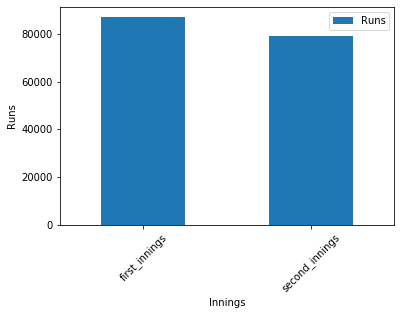

In [6]:
import matplotlib.pyplot as plt

run_by_innings=ball.pivot_table(index="Innings_Id" ,values="Batsman_Scored", aggfunc=np.sum).reset_index()
final2=pd.DataFrame()
first=run_by_innings[(run_by_innings["Innings_Id"] == 1) | (run_by_innings["Innings_Id"] == 3)]["Batsman_Scored"].sum()
second=run_by_innings[(run_by_innings["Innings_Id"] == 2) | (run_by_innings["Innings_Id"] == 4)]["Batsman_Scored"].sum()

innings=["first_innings","second_innings"]
runs= [first,second]
final2["Innings"]=innings
final2["Runs"]=runs
final2.set_index("Innings",inplace=True)
final2.plot(kind="bar",use_index="Innings")
plt.xticks(rotation=45)
plt.ylabel("Runs")
plt.show()

In [7]:
# Toss to fiel or bat

toss_decision= match.groupby("Toss_Decision")["Match_Id"].size().reset_index()
toss_decision.rename(columns={"Match_Id": "no. of matches"},inplace=True)
toss_decision

,Toss_Decision,no. of matches
0,bat,262
1,field,315


<function matplotlib.pyplot.show(*args, **kw)>

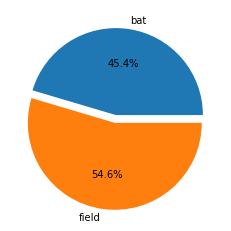

In [8]:
plt.pie(x=toss_decision["no. of matches"],labels=toss_decision["Toss_Decision"],explode=(0,0.09),autopct="%.1f%%")
plt.show

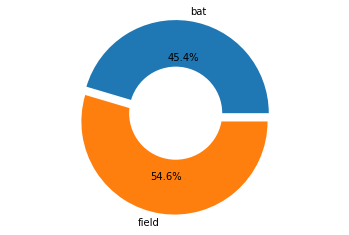

In [9]:
plt.pie(x=toss_decision["no. of matches"],labels=toss_decision["Toss_Decision"],explode=(0,0.09),autopct="%.1f%%")
center_circle=plt.Circle((0,0),0.50,fc="white")
fig=plt.gcf()
fig.gca().add_artist(center_circle)
plt.axis("equal")
plt.show()

In [10]:
car=pd.read_csv("Automobile_data.csv")
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


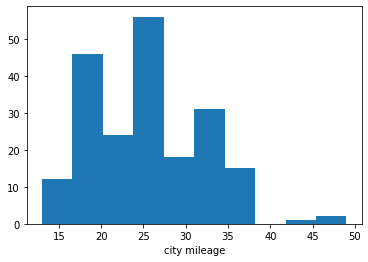

In [11]:
# plotting the distribution of the numerical col

plt.hist(car["city-mpg"])
plt.xlabel("city mileage")
plt.show()


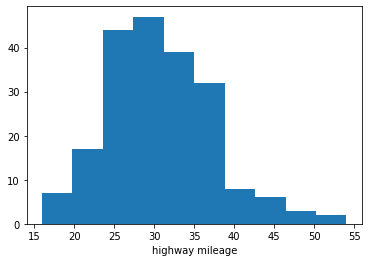

In [12]:
# highway mileage 
plt.hist(car["highway-mpg"])
plt.xlabel("highway mileage")
plt.show()

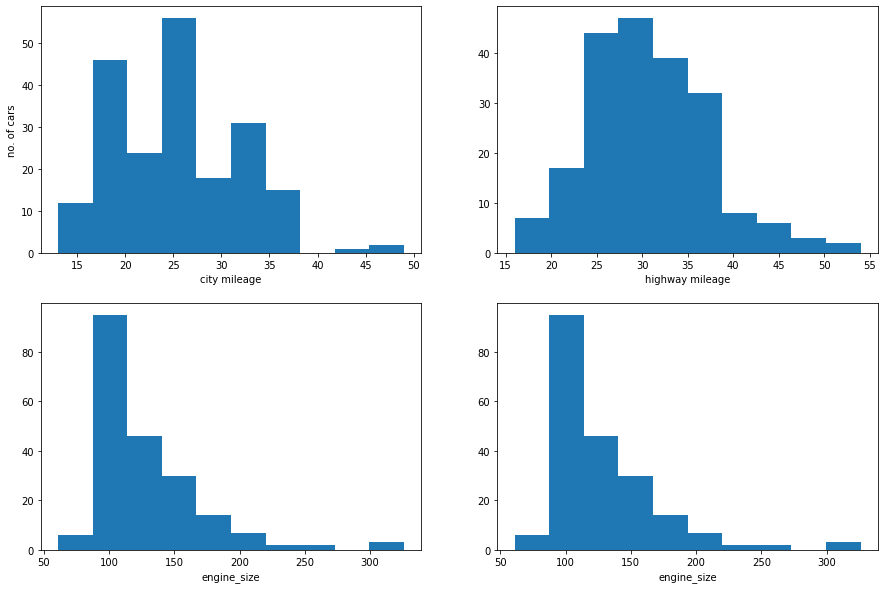

In [13]:
# this is for subploting the plots side by side
# subplot(rows,cols,plot1)

fig=plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(car["city-mpg"])
plt.xlabel("city mileage")
plt.ylabel("no. of cars")

plt.subplot(2,2,2)
plt.hist(car["highway-mpg"])
plt.xlabel("highway mileage")

plt.subplot(2,2,3)
plt.hist(car["engine-size"])
plt.xlabel("engine_size")

plt.subplot(2,2,4)
plt.hist(car["engine-size"])
plt.xlabel("engine_size")

plt.show()

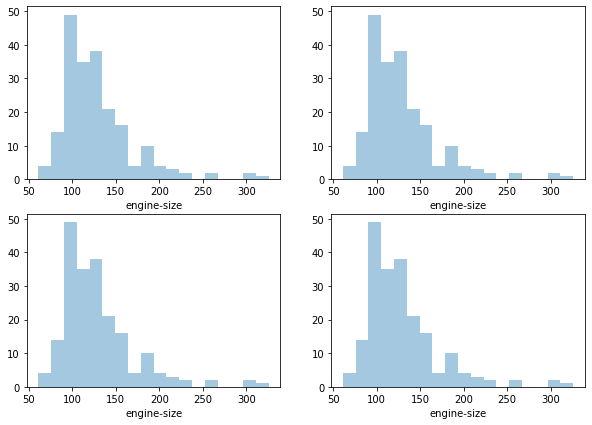

In [14]:
# using seaborn for the above problem

import seaborn as sns
fig,ax=plt.subplots(2,2,figsize=(10,7))
sns.distplot(car["engine-size"],kde=False,ax=ax[0,0])
sns.distplot(car["engine-size"],kde=False,ax=ax[0,1])
sns.distplot(car["engine-size"],kde=False,ax=ax[1,0])
sns.distplot(car["engine-size"],kde=False,ax=ax[1,1])


In [15]:
# skewness treatment using various transformation
# here we apply log and sqrt trnsformation in order to treat the skewness in the data 

car["city_log"]=np.log(car["city-mpg"])
car["city_sqrt"]=np.sqrt(car["city-mpg"])

In [16]:
# skew for each col in data frame

car.skew()

symboling            0.211072
wheel-base           1.050214
length               0.155954
width                0.904003
height               0.063123
curb-weight          0.681398
engine-size          1.947655
compression-ratio    2.610862
city-mpg             0.663704
highway-mpg          0.539997
city_log             0.003106
city_sqrt            0.316761
dtype: float64

In [17]:
car

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city_log,city_sqrt
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,3.044522,4.582576
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,3.044522,4.582576
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,2.944439,4.358899
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.4,10.0,102,5500,24,30,13950,3.178054,4.898979
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.4,8.0,115,5500,18,22,17450,2.890372,4.242641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845,3.135494,4.795832
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045,2.944439,4.358899
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485,2.890372,4.242641
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.4,23.0,106,4800,26,27,22470,3.258097,5.099020


In [18]:
car[["city-mpg","highway-mpg"]].describe()

,city-mpg,highway-mpg
count,205.000000,205.000000
mean,25.219512,30.751220
std,6.542142,6.886443
min,13.000000,16.000000
25%,19.000000,25.000000
50%,24.000000,30.000000
75%,30.000000,34.000000
max,49.000000,54.000000


## Outlier Treatment:

In [19]:
# outliers in city mpg
car[(car["city-mpg"] > (30+(1.5*11))) | (car["city-mpg"] < (19-(1.5*11)))]



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city_log,city_sqrt
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,2.91,3.03,9.5,48,5100,47,53,5151,3.850148,6.855655
30,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,...,2.91,3.41,9.6,58,4800,49,54,6479,3.891820,7.000000


In [20]:
# outliers in highway mpg

car[(car["highway-mpg"] > (34+(1.5*9))) | (car["highway-mpg"] < (25-(1.5*9)))]


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city_log,city_sqrt
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,2.91,3.03,9.5,48,5100,47,53,5151,3.850148,6.855655
30,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,...,2.91,3.41,9.6,58,4800,49,54,6479,3.891820,7.000000
90,1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,...,2.99,3.47,21.9,55,4800,45,50,7099,3.806662,6.708204


([<matplotlib.axis.XTick at 0x2cc288fcb48>,
 <a list of 2 Text xticklabel objects>)

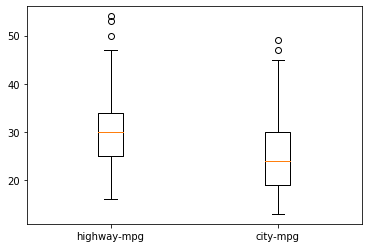

In [21]:
#plotting two box plots simultaneously 
plt.boxplot([car["highway-mpg"],car["city-mpg"]])

plt.xticks([1,2],["highway-mpg","city-mpg"])

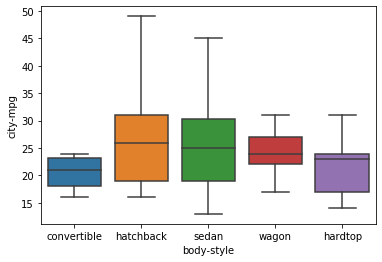

In [22]:
# plotting categorical variable against its numerical col
sns.boxplot(data=car,x="body-style",y="city-mpg")

# here we are capping the outlier values with its Q1 or Q3 value  using where.

In [23]:
car["highway-mpg"]=np.where(car["highway-mpg"] > (34+(1.5*9)),34,car["highway-mpg"])

In [24]:
car["city-mpg"]=np.where((car["city-mpg"] > (30+(1.5*11))),30,car["city-mpg"])

([<matplotlib.axis.XTick at 0x2cc27ae1488>],
 <a list of 1 Text xticklabel objects>)

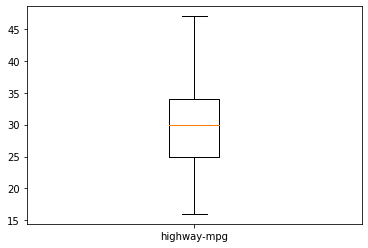

In [27]:
# the outliers are capped
# and we can see there no outliers left in the column "highway-mpg"
import matplotlib.pyplot as plt
plt.boxplot(car["highway-mpg"])
plt.xticks([1],["highway-mpg"])

([<matplotlib.axis.XTick at 0x2cc27b85208>],
 <a list of 1 Text xticklabel objects>)

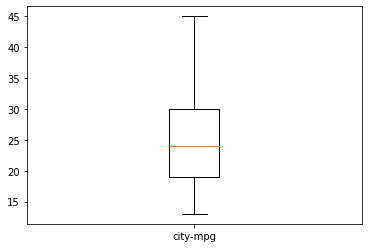

In [28]:
# Also the outliers are capped in the column "city-mpg"
plt.boxplot(car["city-mpg"])
plt.xticks([1],["city-mpg"])